In [1]:
# Load important libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pylab as plt
import cv2

## Importng the training data set

About the data set <br>
We have 34250 images in train_images folder and 3 images in test_images folder. With test.csv and train.csv files. The features of .csv file are:

1. posting_id - The ID/code for the posting
2. image - image ID
3. image_phash - hash/ fingerprint of the image
4. title - image description
5. label_group - ID code for all the posting that maps to the same product (Only provided for train.csv)

In [2]:
train_df = pd.read_csv('../input/shopee-product-matching/train.csv')
train_df.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [3]:
train_df.shape

(34250, 5)

In [4]:
label_group = train_df.groupby('label_group',  as_index=False).count()
label_group

label_group  posting_id  image  image_phash  title
0           258047           3      3            3      3
1           297977           2      2            2      2
2           645628          12     12           12     12
3           801176           2      2            2      2
4           887886           2      2            2      2
...            ...         ...    ...          ...    ...
11009   4292154092           2      2            2      2
11010   4292520070          11     11           11     11
11011   4292939171           2      2            2      2
11012   4293276364           2      2            2      2
11013   4294197112           4      4            4      4

[11014 rows x 5 columns]

We can see that we have 34250 images but only 11014 label_groups this means there are similar images in the dataset. Our task is to retrieve those images.

In [5]:
## Arranging the output in descending order
label_group = label_group.sort_values('image', axis=0, ascending=False)
label_group

label_group  posting_id  image  image_phash  title
3041   1163569239          51     51           51     51
412     159351600          51     51           51     51
2606    994676122          51     51           51     51
8037   3113678103          51     51           51     51
9370   3627744656          51     51           51     51
...           ...         ...    ...          ...    ...
6069   2357508171           2      2            2      2
6068   2357372960           2      2            2      2
6067   2357221297           2      2            2      2
6066   2355878351           2      2            2      2
5507   2141883596           2      2            2      2

[11014 rows x 5 columns]

From the above output it is clear that label_group '1163569239' have 51 images and so on. 

In [6]:
fig = go.Figure([go.Bar(x=label_group.label_group[:30].astype(str).tolist(), y=label_group.image[:30])])
# astype(str): It is used to change data type of a series.
# .tolist(): Pandas series can be converted to a list using tolist() or type casting method.
fig.update_layout(title='Top-20 group_labels', xaxis_title="Label_group",yaxis_title="Count")
fig.show()

In [7]:
def image_grouping(group):
    group_list = train_df[train_df['label_group'] == group]
    group_list = group_list['image'].tolist()
    images_number = len(group_list)
    
    size = np.sqrt(images_number)
    if int(size)*int(size) < images_number:
        size = int(size) + 1
    
    plt.figure(figsize=(20, 20))
    
    index=0
    for image_id in group_list:
        plt.subplot(size, size, index + 1)
        ## subplot(nrows, ncols, index, **kwargs)
        image = cv2.imread(os.path.join('../input/shopee-product-matching/train_images/', image_id))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ## Various color spaces such as RGB, BGR, HSV can be mutually converted using OpenCV function cvtColor().
        
        plt.imshow(image)
        plt.title(image_id, fontsize=6)
        plt.axis("off")
        index+=1
    plt.show()
    return images_number, size

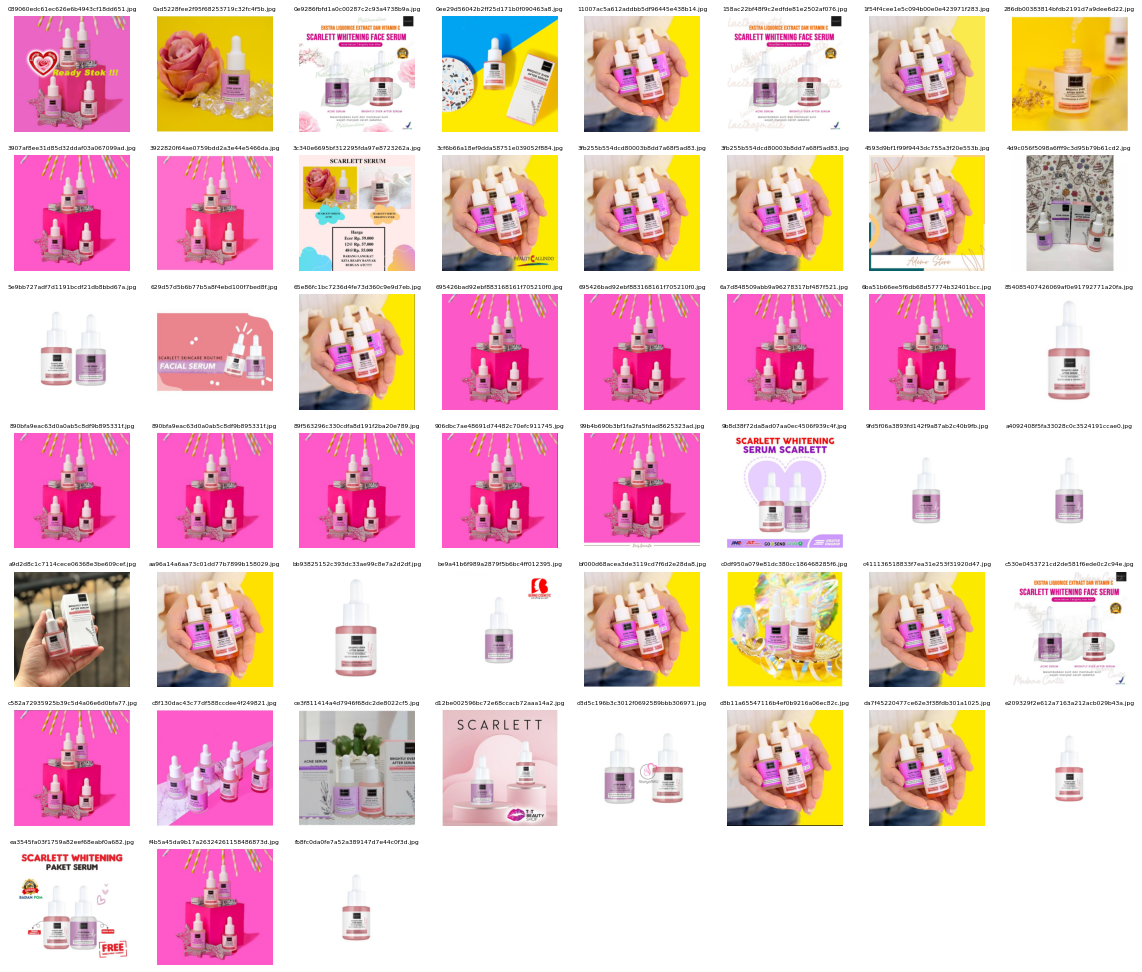

(51, 8)

In [8]:
image_grouping(1163569239)

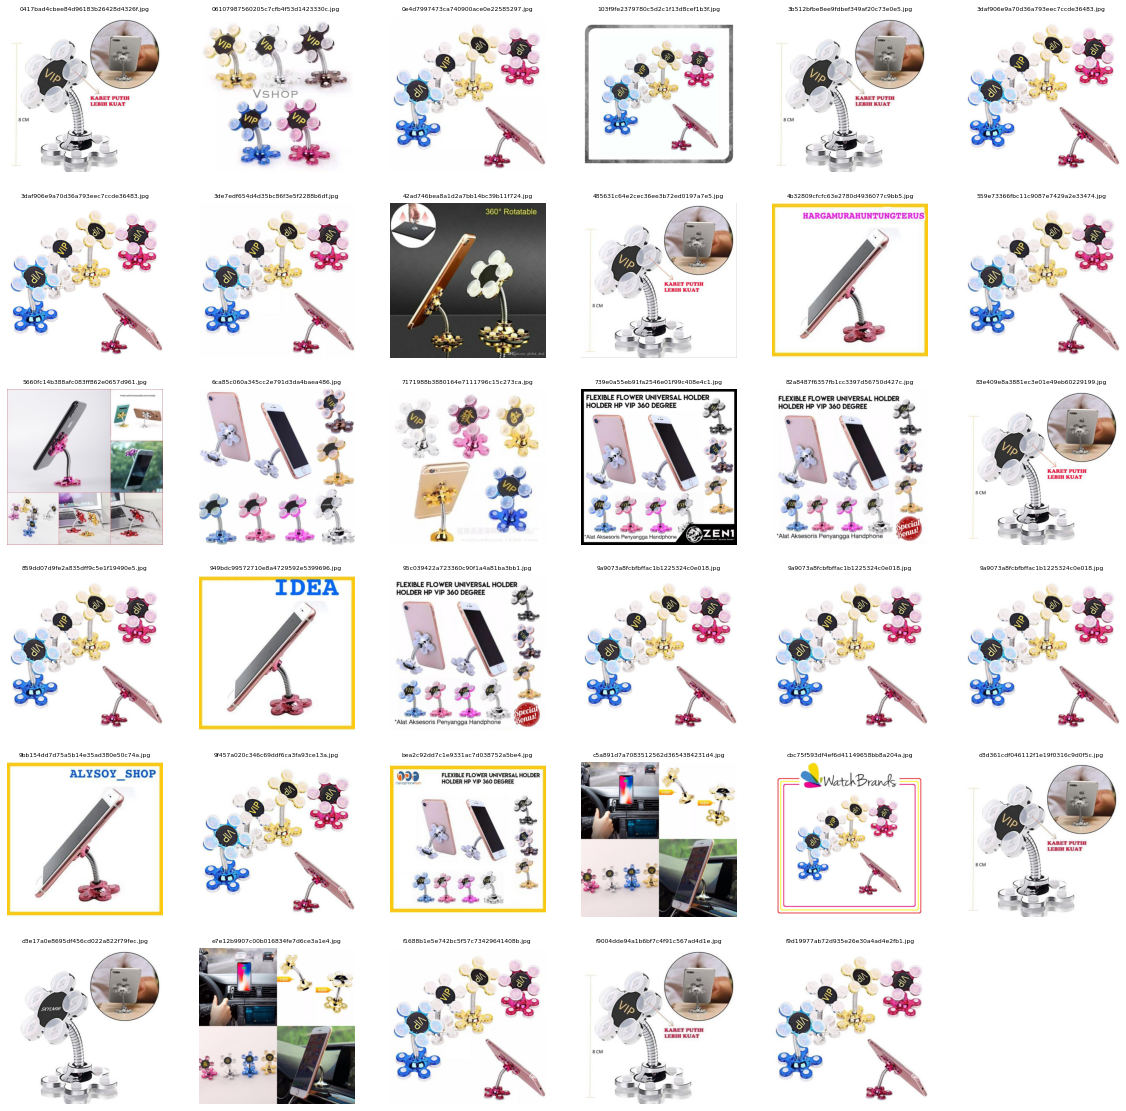

(35, 6)

In [9]:
image_grouping(452508504)

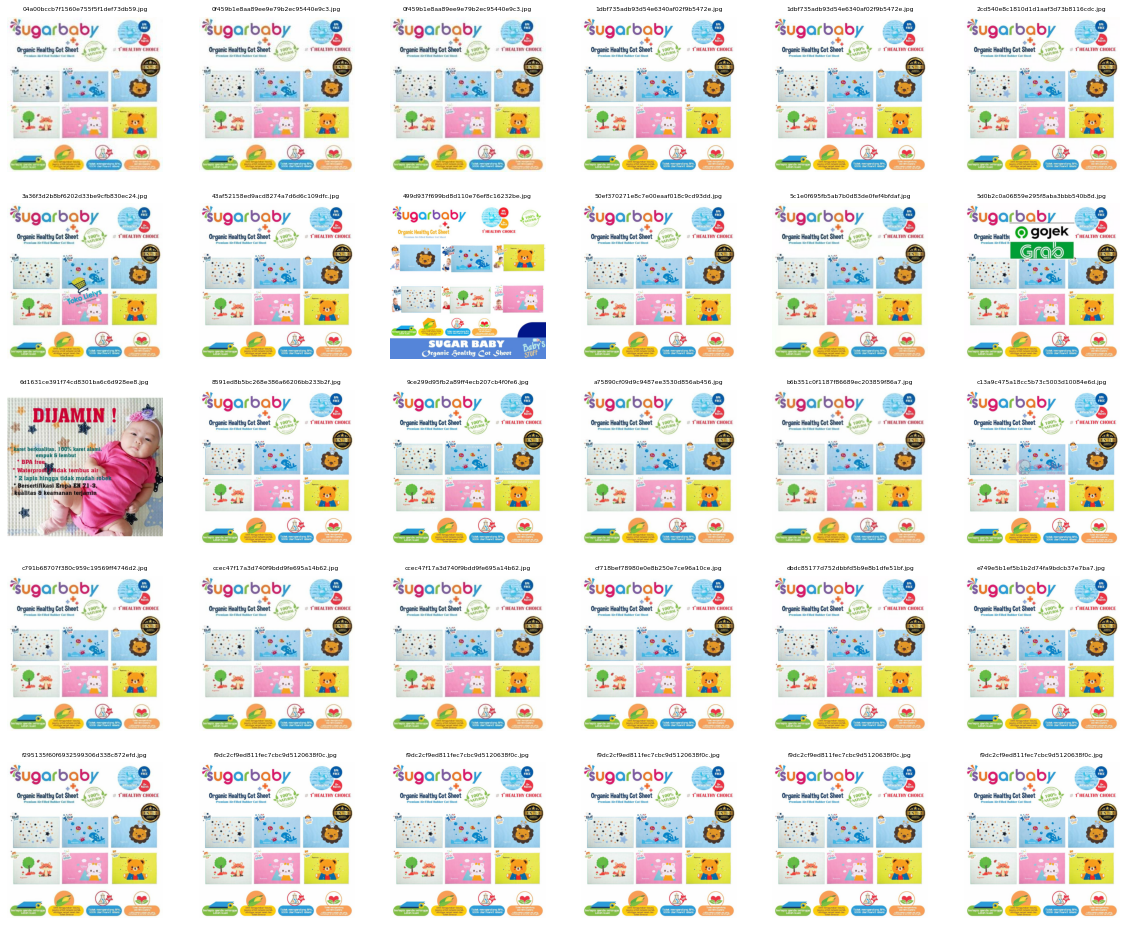

(30, 6)

In [10]:
image_grouping(997220911)

In [11]:
## Similarity from test data set
import gensim
import spacy
nlp = spacy.load('en_core_web_lg')

In [12]:
data_train = pd.read_csv('../input/shopee-product-matching/train.csv')
data_train.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [13]:
data_train.shape

(34250, 5)

<AxesSubplot:>

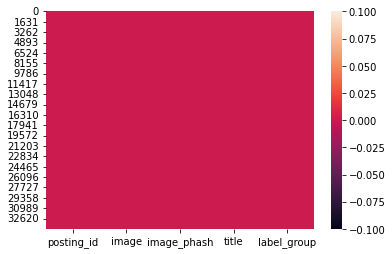

In [14]:
#Check for missing values
import seaborn as sns
sns.heatmap(data_train.isnull())

In [15]:
data_test = pd.read_csv('../input/shopee-product-matching/test.csv')
data_test.head()

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title  
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...  
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...  
2   READY Lemonilo Mie instant sehat kuah dan goreng

In [16]:
data_test.shape

(3, 4)

## Cleaning data_train text and data_test text

### Text processing for data_train

In [17]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk
from nltk.corpus import stopwords
import re

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
#Clean the text by removing special chracters and stop words
def textpreprocessing(text):
    text=text.strip()
    text = text.lower()
    punctuations=r'[/\,\-!@%#$^&*|_+)(:]'
    
    text = re.sub(punctuations, '', text)
    string=""
    for word in text.split():
        if not word in stop_words:
            string += word + " "
    return string.strip()

In [20]:
stopwords = nltk.corpus.stopwords.words('english')
data_train['clean_title'] = data_train['title'].map(textpreprocessing)
data_train

posting_id                                 image  \
0       train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg   
1      train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg   
2      train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg   
3      train_2406599165  00117e4fc239b1b641ff08340b429633.jpg   
4      train_3369186413  00136d1cf4edede0203f32f05f660588.jpg   
...                 ...                                   ...   
34245  train_4028265689  fff1c07ceefc2c970a7964cfb81981c5.jpg   
34246   train_769054909  fff401691371bdcb382a0d9075dfea6a.jpg   
34247   train_614977732  fff421b78fa7284284724baf249f522e.jpg   
34248  train_3630949769  fff51b87916dbfb6d0f8faa01bee67b8.jpg   
34249  train_1792180725  ffffa0ab2ae542357671e96254fa7167.jpg   

            image_phash                                              title  \
0      94974f937d4c2433                          Paper Bag Victoria Secret   
1      af3f9460c2838f0f  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   
2      b94cb00ed3e50f78        Maling TTS Canned Pork Luncheon Meat 397 gr   
3      8514fc58eafea283  Daster Batik Lengan pendek - Motif Acak / Camp...   
4      a6f319f924ad708c                  Nescafe \xc3\x89clair Latte 220ml   
...                 ...                                                ...   
34245  e3cd72389f248f21  Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...   
34246  be86851f72e2853c    MamyPoko Pants Royal Soft - S 70 - Popok Celana   
34247  ad27f0d08c0fcbf0  KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...   
34248  e3b13bd1d896c05c  Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...   
34249  af8bc4b2d2cf9083  FLEX TAPE PELAPIS BOCOR / ISOLASI AJAIB / ANTI...   

       label_group                                        clean_title  
0        249114794                          paper bag victoria secret  
1       2937985045  double tape 3m vhb 12 mm x 45 original double ...  
2       2395904891        maling tts canned pork luncheon meat 397 gr  
3       4093212188  daster batik lengan pendek motif acak campur l...  
4       3648931069                  nescafe \xc3\x89clair latte 220ml  
...            ...                                                ...  
34245   3776555725  masker bahan kain spunbond non woven 75 gsm 3 ...  
34246   2736479533          mamypoko pants royal soft 70 popok celana  
34247   4101248785  khanzaacc robot re101s 1.2mm subwoofer bass me...  
34248   1663538013  kaldu non msg halal mama kamu ayam kampung sap...  
34249    459464107   flex tape pelapis bocor isolasi ajaib anti bocor  

[34250 rows x 6 columns]

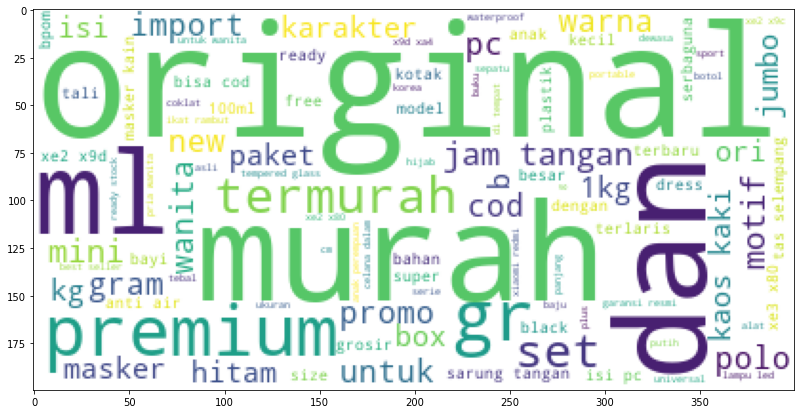

In [21]:
#word cloud visualization
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
wc = WordCloud(
    background_color='white',
    max_words = 100,
    random_state = 42,
    max_font_size=100
    )

wc.generate(' '.join(data_train['clean_title']))
plt.figure(figsize=(50,7))
plt.imshow(wc)
plt.show()

### Text processing for data_text

In [22]:
data_test['clean_title'] = data_test['title'].map(textpreprocessing)
data_test

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title  \
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...   
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...   
2   READY Lemonilo Mie instant sehat kuah dan goreng   

                                         clean_title  
0  edufuntoys character phone ada lampu dan musik...  
1  beli 1 free spatula masker komedo blackheads m...  
2   ready lemonilo mie instant sehat kuah dan goreng

## Text similarity (test data and train data)

In [23]:
ref_sent = data_test.loc[data_test['posting_id']=='test_4015706929','clean_title'].iloc[0]
ref_sent

'ready lemonilo mie instant sehat kuah dan goreng'

In [24]:
## Vectorized sentence
ref_sent_vec = nlp(ref_sent)

In [25]:
all_docs = [nlp(row) for row in data_train['clean_title']]

In [26]:
print(len(all_docs))

34250


In [27]:
similarity_scores = []
doc_id = []

for i in range(len(all_docs)):
    sim = all_docs[i].similarity(ref_sent_vec)
    similarity_scores.append(sim)
    doc_id.append(i)
    similarity_document = pd.DataFrame(list(zip(doc_id, similarity_scores)), columns = ['doc_id', 'similarities'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [28]:
similarity_document

doc_id  similarities
0           0      0.220580
1           1      0.067199
2           2      0.391853
3           3      0.329151
4           4      0.389698
...       ...           ...
34245   34245      0.438681
34246   34246      0.158681
34247   34247      0.082686
34248   34248      0.696806
34249   34249      0.202719

[34250 rows x 2 columns]

In [29]:
sorted_similarity = similarity_document.sort_values(by = 'similarities', ascending = False )

In [30]:
sorted_similarity.shape

(34250, 2)

In [31]:
top_10_similar_titles = data_train.iloc[sorted_similarity['doc_id'][1:11]]

In [32]:
top_sim_scores = pd.concat([top_10_similar_titles,sorted_similarity['similarities'][1:11]], axis=1)

In [33]:
top_sim_scores

posting_id                                 image  \
7051     train_33320904  356b48432b16923d69b144a9ac5bb35a.jpg   
20450  train_3341330490  998ddd1fd4ba143ed832719cf994827e.jpg   
33889  train_2895779112  fd4ded3cbfa2019ecfe680f3ee276a91.jpg   
6758   train_3238336617  33291f0cc48a5b7e127a614df7dd664a.jpg   
18686  train_4270914492  8cc597b462e585cf605c593c8acbae98.jpg   
28683  train_2648908268  d68907347b5b9bae0cde75776cee11c2.jpg   
31795  train_2468168402  ee441875a602b4b7baa6d298b4f7bd87.jpg   
13029  train_2488829161  6209656fe521932f40844025d28185dd.jpg   
26469  train_3004985828  c5fb9ee0df6e36df1b849510e17c7662.jpg   
19141  train_2192924447  9054fa5a9f52b5ac1a14125c8fec8fba.jpg   

            image_phash                                              title  \
7051   8396253fc63d49b1    Lemonilo Mie Goreng Instant Sehat - Mie Organic   
20450  bb86c469f1a42e1b    Lemonilo Mie Goreng Instant Sehat - Mie Organic   
33889  91ea64b3856c38d7  Lemonilo Mie GORENG & KUAH Instant Sehat 70gr ...   
6758   bb83c478f8a12e0f  Lemonilo Mie Instan - Mie Goreng Instant - Beb...   
18686  e89dc66299669366  Lemonilo Mie Instant Sehat 70gr - Mie Organik ...   
28683  dd4ce2b284331e5d  Bango Bumbu Nasi Goreng Kambing dan Mie Goreng...   
31795  b0cfc330cf32cac3  Fitmee RASA AYAM BAWANG mie instan sehat dari ...   
13029  ef90816f5c6a2b94  Ramen Gorilla Mie Instant Pedas Mi Instan Gori...   
26469  c3a41b826d9a553f  Lemonilo Mie Instant Sehat 70 gr Mie Organik /...   
19141  facfc429c3b4d260  FITMEE - FITMEE AYAM BAWANG  - MIE SEHAT - MIE...   

       label_group                                        clean_title  \
7051    1537696988      lemonilo mie goreng instant sehat mie organic   
20450   1537696988      lemonilo mie goreng instant sehat mie organic   
33889   3123493047  lemonilo mie goreng kuah instant sehat 70gr mi...   
6758    1537696988  lemonilo mie instan mie goreng instant bebas m...   
18686   3123493047  lemonilo mie instant sehat 70gr mie organik au...   
28683   3073161644  bango bumbu nasi goreng kambing dan mie goreng...   
31795   2187173784  fitmee rasa ayam bawang mie instan sehat dari ...   
13029   4010992987  ramen gorilla mie instant pedas mi instan gori...   
26469   3123493047  lemonilo mie instant sehat 70 gr mie organik m...   
19141    321842376  fitmee fitmee ayam bawang mie sehat mie rendah...   

       similarities  
7051       0.883637  
20450      0.883637  
33889      0.846641  
6758       0.826463  
18686      0.814283  
28683      0.808284  
31795      0.804763  
13029      0.801551  
26469      0.799957  
19141      0.797788

In [34]:
top_sim_scores.shape

(10, 7)

In [35]:
for(clean_title,sim) in zip(top_sim_scores['clean_title'],top_sim_scores['similarities']):
    print('Top 10 similar sentences are: {} \n with a similarity score of {:.2f}\n'.format(clean_title,sim))

Top 10 similar sentences are: lemonilo mie goreng instant sehat mie organic 
 with a similarity score of 0.88

Top 10 similar sentences are: lemonilo mie goreng instant sehat mie organic 
 with a similarity score of 0.88

Top 10 similar sentences are: lemonilo mie goreng kuah instant sehat 70gr mie organik lemonilo mie instan 
 with a similarity score of 0.85

Top 10 similar sentences are: lemonilo mie instan mie goreng instant bebas msg tanpa pengawet mie alami sayur jagapati 
 with a similarity score of 0.83

Top 10 similar sentences are: lemonilo mie instant sehat 70gr mie organik audrey baby shop 
 with a similarity score of 0.81

Top 10 similar sentences are: bango bumbu nasi goreng kambing dan mie goreng aceh [exp.2021] 
 with a similarity score of 0.81

Top 10 similar sentences are: fitmee rasa ayam bawang mie instan sehat dari korea 
 with a similarity score of 0.80

Top 10 similar sentences are: ramen gorilla mie instant pedas mi instan gorila kuah goreng yamie sama seperti mi

In [36]:
image = top_sim_scores['image'].tolist()
paths = []

for image_id in image:
    path = '../input/shopee-product-matching/train_images/' + image_id
    paths.append(path)
print(paths)

['../input/shopee-product-matching/train_images/356b48432b16923d69b144a9ac5bb35a.jpg', '../input/shopee-product-matching/train_images/998ddd1fd4ba143ed832719cf994827e.jpg', '../input/shopee-product-matching/train_images/fd4ded3cbfa2019ecfe680f3ee276a91.jpg', '../input/shopee-product-matching/train_images/33291f0cc48a5b7e127a614df7dd664a.jpg', '../input/shopee-product-matching/train_images/8cc597b462e585cf605c593c8acbae98.jpg', '../input/shopee-product-matching/train_images/d68907347b5b9bae0cde75776cee11c2.jpg', '../input/shopee-product-matching/train_images/ee441875a602b4b7baa6d298b4f7bd87.jpg', '../input/shopee-product-matching/train_images/6209656fe521932f40844025d28185dd.jpg', '../input/shopee-product-matching/train_images/c5fb9ee0df6e36df1b849510e17c7662.jpg', '../input/shopee-product-matching/train_images/9054fa5a9f52b5ac1a14125c8fec8fba.jpg']


## Testing sample image 3:

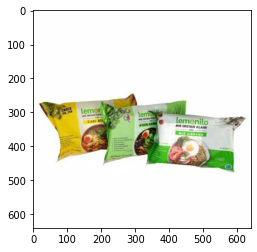

<Figure size 2160x2160 with 0 Axes>

In [37]:
import matplotlib.image as mpimg
img = mpimg.imread('../input/shopee-product-matching/test_images/0008377d3662e83ef44e1881af38b879.jpg')
imgplot = plt.imshow(img)
plt.figure(figsize=(30, 30))
plt.show()

Populating the interactive namespace from numpy and matplotlib


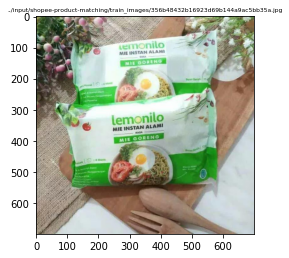

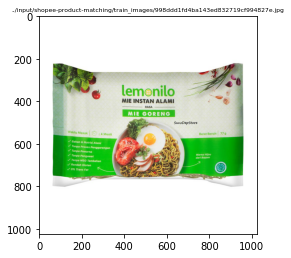

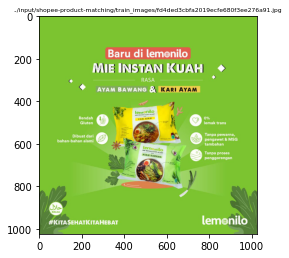

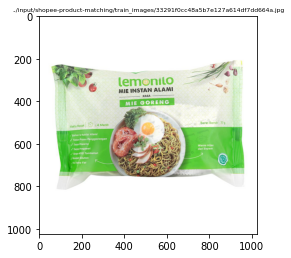

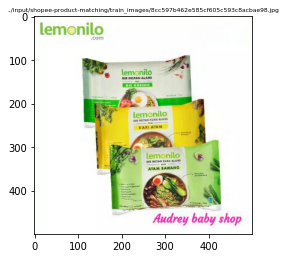

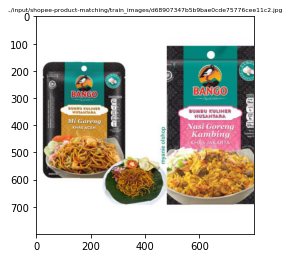

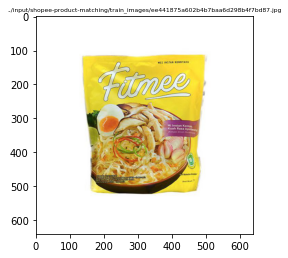

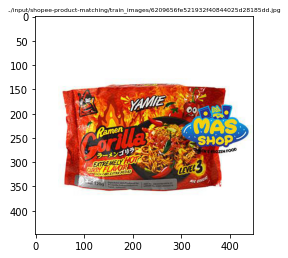

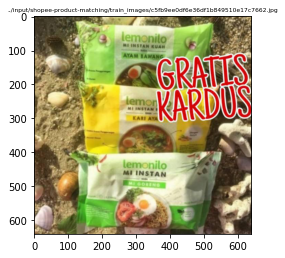

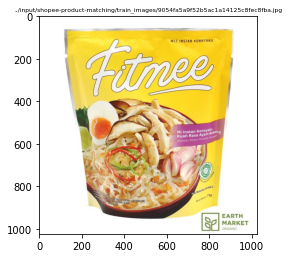

In [38]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for path in paths:
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.title(path, fontsize=6)
    plt.show()



## Testing sample image 2

In [39]:
ref_sent2 = data_test.loc[data_test['posting_id']=='test_3588702337','clean_title'].iloc[0]
ref_sent2

'beli 1 free spatula masker komedo blackheads mask 10gr flawless go surabaya flawless.go'

In [40]:
## Vectorized sentence
ref_sent_vec2 = nlp(ref_sent2)

In [41]:
similarity_scores2 = []
doc_id2 = []

for i in range(len(all_docs)):
    sim2 = all_docs[i].similarity(ref_sent_vec2)
    similarity_scores2.append(sim2)
    doc_id2.append(i)
    similarity_document2 = pd.DataFrame(list(zip(doc_id2, similarity_scores2)), columns = ['doc_id', 'similarities'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [42]:
sorted_similarity2 = similarity_document2.sort_values(by = 'similarities', ascending = False )

In [43]:
top_5_similar_titles2 = data_train.iloc[sorted_similarity2['doc_id'][1:6]]

In [44]:
top_sim_scores2 = pd.concat([top_5_similar_titles2,sorted_similarity2['similarities'][1:6]], axis=1)

In [45]:
ref_sent2

'beli 1 free spatula masker komedo blackheads mask 10gr flawless go surabaya flawless.go'

In [46]:
top_sim_scores2

posting_id                                 image  \
23389  train_3345044489  afb58e525e819f94b7636262b3061d7d.jpg   
20871   train_331882059  9c9c47e0c18601b918341ca934530b7a.jpg   
10375   train_674434125  4dccaba96a9115db82f0ae7607863819.jpg   
8603   train_1638941829  4088c0256bcfe793b727458d7fcce246.jpg   
5223   train_1698683055  2792906377bfcbed7d9986ba7935a212.jpg   

            image_phash                                              title  \
23389  f198efa1a234c33c  (FREE SPATULA) Habiti Organic Face Mask Habiti...   
20871  eea515ee40af0bc1  BELI 3 FREE 1 Garnier Serum Mask Hydrabomb Gre...   
10375  ac3e87439a8717b2  Saffron Mask by HeyGurl! // masker organic || ...   
8603   e1879a782f689e91  \xe2\xad\x90Bobastore\xe2\xad\x90R015 Mangkok ...   
5223   8ee1f11f000f6fe4  MAUMUKOSMETIK - Hanasui Naturgo Lightening Pee...   

       label_group                                        clean_title  \
23389   3476791345  free spatula habiti organic face mask habitior...   
20871   1332568669  beli 3 free 1 garnier serum mask hydrabomb gre...   
10375   2027903738   saffron mask heygurl masker organic free spatula   
8603     219382266  \xe2\xad\x90bobastore\xe2\xad\x90r015 mangkok ...   
5223    2430246747  maumukosmetik hanasui naturgo lightening peel ...   

       similarities  
23389      0.789994  
20871      0.785905  
10375      0.759327  
8603       0.759092  
5223       0.757900

In [47]:
image2 = top_sim_scores2['image'].tolist()
paths2 = []

for image_id2 in image2:
    path2 = '../input/shopee-product-matching/train_images/' + image_id2
    paths2.append(path2)
print(paths2)

['../input/shopee-product-matching/train_images/afb58e525e819f94b7636262b3061d7d.jpg', '../input/shopee-product-matching/train_images/9c9c47e0c18601b918341ca934530b7a.jpg', '../input/shopee-product-matching/train_images/4dccaba96a9115db82f0ae7607863819.jpg', '../input/shopee-product-matching/train_images/4088c0256bcfe793b727458d7fcce246.jpg', '../input/shopee-product-matching/train_images/2792906377bfcbed7d9986ba7935a212.jpg']


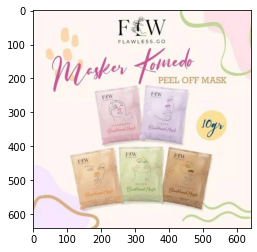

<Figure size 2160x2160 with 0 Axes>

In [48]:
img = mpimg.imread('../input/shopee-product-matching/test_images/0007585c4d0f932859339129f709bfdc.jpg')
imgplot = plt.imshow(img)
plt.figure(figsize=(30, 30))
plt.show()

Populating the interactive namespace from numpy and matplotlib


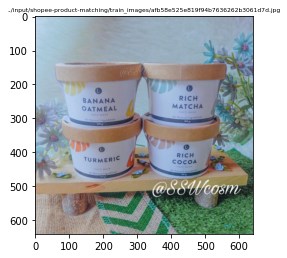

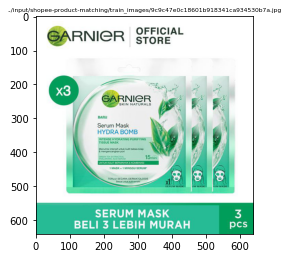

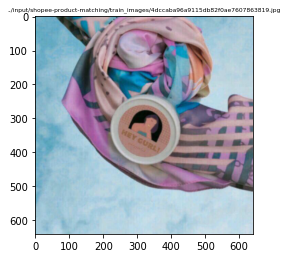

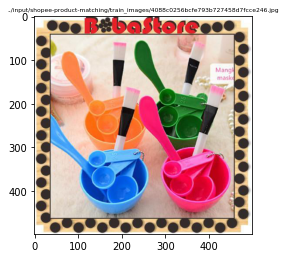

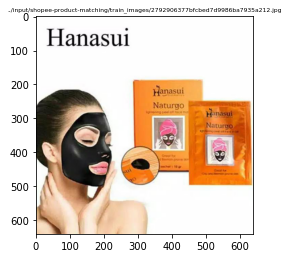

In [49]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for path2 in paths2:
    img2 = mpimg.imread(path2)
    imgplot2 = plt.imshow(img2)
    plt.title(path2, fontsize=6)
    plt.show()

## Testing sample image 1

In [50]:
ref_sent1 = data_test.loc[data_test['posting_id']=='test_2255846744','clean_title'].iloc[0]
ref_sent1

'edufuntoys character phone ada lampu dan musik mainan telepon'

In [51]:
## Vectorized sentence
ref_sent_vec1 = nlp(ref_sent1)

In [52]:
similarity_scores1 = []
doc_id1 = []

for i in range(len(all_docs)):
    sim1 = all_docs[i].similarity(ref_sent_vec1)
    similarity_scores1.append(sim2)
    doc_id1.append(i)
    similarity_document1 = pd.DataFrame(list(zip(doc_id1, similarity_scores1)), columns = ['doc_id', 'similarities'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [53]:
sorted_similarity1 = similarity_document1.sort_values(by = 'similarities', ascending = False )
top_5_similar_titles1 = data_train.iloc[sorted_similarity1['doc_id'][1:6]]
top_sim_scores1 = pd.concat([top_5_similar_titles1,sorted_similarity1['similarities'][1:6]], axis=1)

In [54]:
ref_sent1

'edufuntoys character phone ada lampu dan musik mainan telepon'

In [55]:
top_sim_scores1

posting_id                                 image  \
22828  train_4169474828  ab6573fe0c7461430fd43e68a4250e63.jpg   
22842  train_4182910081  ab76dcea189f40d43339ffd9efd7a38a.jpg   
22841  train_2595001469  ab75f031354c3222c97b0befa6d96d4b.jpg   
22840   train_167978582  ab73938cfff00177b42d730d44dd117f.jpg   
22839  train_1708397227  ab727f7acbbb49a9f6731f2f81dfe89f.jpg   

            image_phash                                              title  \
22828  bbb186c4c21e8d79  Paket 4 Buku - Blink Kemampuan Berpikir Hidup ...   
22842  948e69d591e80f76  Camera Lens Protector Film iPhone 11 Pro / iPh...   
22841  eb6e94901b6739c8                  Quantum Selang Gas Paket - QRL032   
22840  abdce09ce9438786  Dress Kerut Panjang Dewasa Bali/Pilih Motif da...   
22839  c57f224493af1726                         Nestle Carnation 370gr DUS   

       label_group                                        clean_title  \
22828   3050095186  paket 4 buku blink kemampuan berpikir hidup mi...   
22842   1417997905  camera lens protector film iphone 11 pro iphon...   
22841    314590047                    quantum selang gas paket qrl032   
22840   1223373872  dress kerut panjang dewasa balipilih motif dan...   
22839   2641871086                         nestle carnation 370gr dus   

       similarities  
22828      0.436156  
22842      0.436156  
22841      0.436156  
22840      0.436156  
22839      0.436156

In [56]:
image1 = top_sim_scores1['image'].tolist()
paths1 = []

for image_id1 in image1:
    path1 = '../input/shopee-product-matching/train_images/' + image_id1
    paths1.append(path1)
print(paths1)

['../input/shopee-product-matching/train_images/ab6573fe0c7461430fd43e68a4250e63.jpg', '../input/shopee-product-matching/train_images/ab76dcea189f40d43339ffd9efd7a38a.jpg', '../input/shopee-product-matching/train_images/ab75f031354c3222c97b0befa6d96d4b.jpg', '../input/shopee-product-matching/train_images/ab73938cfff00177b42d730d44dd117f.jpg', '../input/shopee-product-matching/train_images/ab727f7acbbb49a9f6731f2f81dfe89f.jpg']


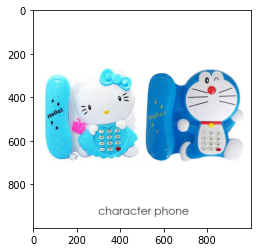

<Figure size 2160x2160 with 0 Axes>

In [57]:
img = mpimg.imread('../input/shopee-product-matching/test_images/0006c8e5462ae52167402bac1c2e916e.jpg')
imgplot = plt.imshow(img)
plt.figure(figsize=(30, 30))
plt.show()

Populating the interactive namespace from numpy and matplotlib


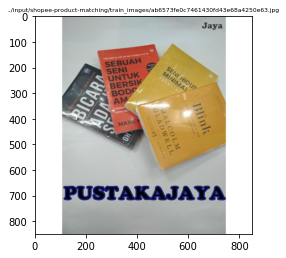

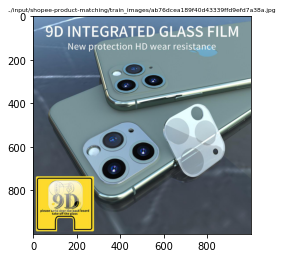

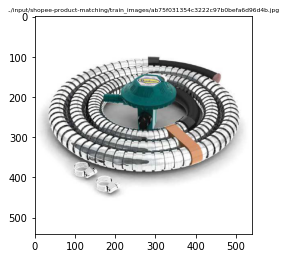

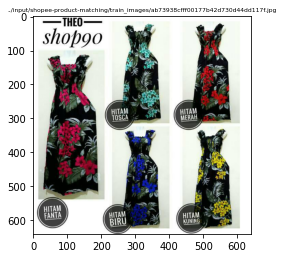

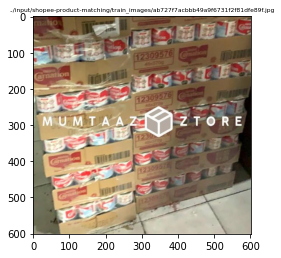

In [58]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for path1 in paths1:
    img1 = mpimg.imread(path1)
    imgplot1 = plt.imshow(img1)
    plt.title(path1, fontsize=6)
    plt.show()

## ---------------------------------------------- THE END ------------------------------------------------